<a href="https://colab.research.google.com/github/salimNabbout/Qualidade_Vinhos_Norte_Portugal/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

##POS GRADUAÇÃO EM CIÊNCIAS DE DADOS - PUC RIO

##MVP SPRINT 2

##PROJETO - Deep Learning

##ALUNO: SALIM JORGE NABBOUT



# 1.0 Justificativa do Projeto


O projeto consiste modelo baseado em Deep Learning para a identificação de imagens oriundas de uma determinado Banco de dados.

para este projeto foi utilizado o dataset CIFAR 10

O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas 32x32 em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

Premissas:

As classes são completamente mutuamente exclusivas. Não há sobreposição entre automóveis e caminhões. "Automóvel" inclui sedans, SUVs, coisas desse tipo. "Caminhão" inclui apenas caminhões grandes.




# 2.0 Importanto Bibliotecas

In [46]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as keras




# 3.0 Carregando Dataset

In [47]:
dataset = tf.keras.datasets.cifar10
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


# 3.1 Detalhando DATASET

0 - Avião

1 - Automóvel

2 - Passaro

3 - Gato

4 - Cervo

5 - Cachorro

6 - Sapo

7 - Cavalo

8 - Enviar

9 - Caminhão

#4.0 Explorando os dados

In [48]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# 5.0 Explorando os dados


Observou se inconsistencia entre os nomes das classificações, oriundas do dataset e a imagem processada pelo plt.colorbar.

As imagens treinos declaradas não conferem com as do dataset

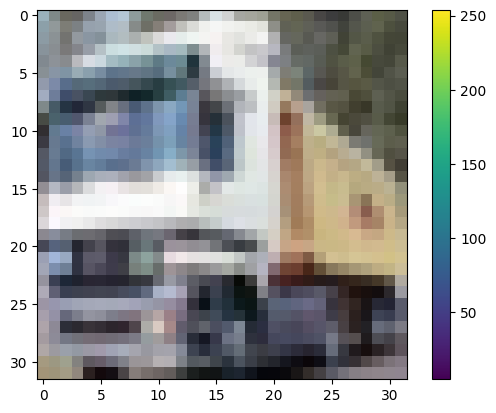

In [72]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Avião', 'Automóvel', 'Passaro',
                           'Gato', 'Cervo', 'Cachorro', 'Sapo',
                           'Cavalo', 'Enviar', 'Caminhão']

plt.imshow(imagens_treino[1])
plt.colorbar()

Normalizando as imagens

# 6.0 Normalizando Imagens

In [73]:
imagens_treino = imagens_treino/float(255)

# 7.0 Criando - Compilando - Treinando e Normalizando o Modelo

In [74]:
import tensorflow as tf
from tensorflow import keras

# Carregando o dataset do CIFAR 10
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalizando os valores de pixel para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Criando os Modelo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.005)

parando_cedo = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                    monitor='val_loss', save_best_only=True)
]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Variando Parametros - Melhora da Performance
# Batch_Size
# Epochs

historico = modelo.fit(train_images, train_labels,
                       batch_size=380,
                       epochs=10,
                       validation_split=0.2,
                       callbacks=parando_cedo)


Epoch 1/10
106/106 [==============================] - 4s 35ms/step - loss: 2.2123 - accuracy: 0.2259 - val_loss: 1.9258 - val_accuracy: 0.3188
Epoch 2/10
106/106 [==============================] - 4s 39ms/step - loss: 1.9100 - accuracy: 0.3089 - val_loss: 1.8278 - val_accuracy: 0.3520
Epoch 3/10
106/106 [==============================] - 3s 32ms/step - loss: 1.8469 - accuracy: 0.3370 - val_loss: 1.8109 - val_accuracy: 0.3521
Epoch 4/10
106/106 [==============================] - 3s 33ms/step - loss: 1.8115 - accuracy: 0.3503 - val_loss: 1.7689 - val_accuracy: 0.3707
Epoch 5/10
106/106 [==============================] - 4s 38ms/step - loss: 1.7859 - accuracy: 0.3609 - val_loss: 1.7610 - val_accuracy: 0.3730
Epoch 6/10
106/106 [==============================] - 3s 33ms/step - loss: 1.7709 - accuracy: 0.3636 - val_loss: 1.7464 - val_accuracy: 0.3788
Epoch 7/10
106/106 [==============================] - 3s 33ms/step - loss: 1.7563 - accuracy: 0.3697 - val_loss: 1.7083 - val_accuracy: 0.3929

# 8.0 Sumário do Modelo

In [75]:
sumario_do_modelo = modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               786688    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


# 9.0 Pesos da primeira camada DENSE - Processamento

In [76]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.02792927, -0.00373939,  0.02032336, ...,  0.00971599,
         0.00063605, -0.06021225],
       [ 0.03567228, -0.05280499, -0.00902198, ...,  0.02659422,
        -0.00750391, -0.02976294],
       [ 0.02331997,  0.01466603, -0.02981322, ..., -0.0407236 ,
         0.02940797, -0.05292826],
       ...,
       [-0.01128103, -0.05090598, -0.01610743, ..., -0.02693106,
        -0.03179347,  0.04658198],
       [-0.01129008, -0.02135096, -0.01395089, ..., -0.011921  ,
         0.02133067, -0.01956587],
       [ 0.03093136, -0.01011061, -0.04170971, ...,  0.00297252,
        -0.00697012,  0.03805938]], dtype=float32)

# 10.0 Vies na Camada de Processamento - DENSE

In [77]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

# 11 Configuração dos Pesos da camada DENSE

In [78]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((3072, 256))

pesos_camada_dense_aleatorios = np.random.rand(3072, 256)

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.25728577, 0.30497184, 0.661966  , ..., 0.77765423, 0.56938595,
         0.06881054],
        [0.34735072, 0.07548431, 0.8775067 , ..., 0.23060061, 0.6718545 ,
         0.8325026 ],
        [0.52872247, 0.18342587, 0.34149158, ..., 0.24032448, 0.67609227,
         0.8024342 ],
        ...,
        [0.5705026 , 0.03690592, 0.87130123, ..., 0.7497586 , 0.12091012,
         0.56237906],
        [0.726661  , 0.86635876, 0.97118086, ..., 0.9831608 , 0.9889816 ,
         0.27027482],
        [0.46930966, 0.0354552 , 0.79516315, ..., 0.42381358, 0.01893902,
         0.07200956]], dtype=float32),
 array([-0.00177983,  0.00490083, -0.00503956,  0.08778966,  0.24927288,
        -0.00600217, -0.00600179, -0.00593143, -0.00651192, -0.00830725,
        -0.00585748, -0.00552653, -0.00599461, -0.00717515, -0.0059841 ,
        -0.00600412, -0.03029884, -0.00486894, -0.00275492, -0.00277288,
        -0.00600469, -0.00441474, -0.00600466, -0.00286387, -0.00598939,
        -0.00246761, -0.00600

# 12 Compilando Modelo


In [79]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 14s 11ms/step - loss: 470.2994 - accuracy: 0.1204 - val_loss: 52.0548 - val_accuracy: 0.2297
Epoch 2/5
1250/1250 [==============================] - 13s 10ms/step - loss: 98.5726 - accuracy: 0.1521 - val_loss: 37.9460 - val_accuracy: 0.1234
Epoch 3/5
1250/1250 [==============================] - 12s 10ms/step - loss: 28.3025 - accuracy: 0.1491 - val_loss: 14.8625 - val_accuracy: 0.1402
Epoch 4/5
1250/1250 [==============================] - 14s 11ms/step - loss: 15.9095 - accuracy: 0.1577 - val_loss: 8.5839 - val_accuracy: 0.1895
Epoch 5/5
1250/1250 [==============================] - 11s 9ms/step - loss: 7.0336 - accuracy: 0.1798 - val_loss: 3.2304 - val_accuracy: 0.2116


# 13 Plotando Grafico Acurácia X Épocas


o Modelo apresenta problema de OVERFITTING

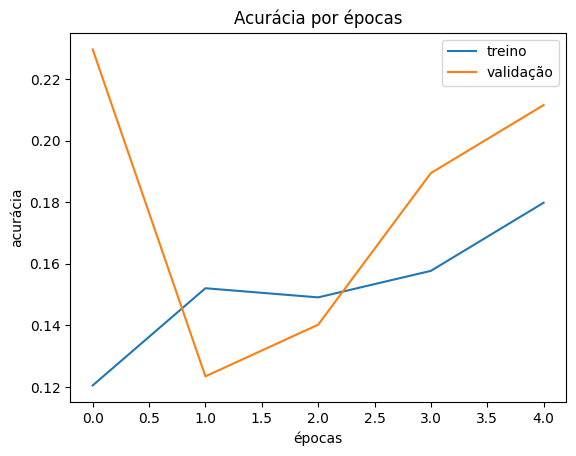

In [80]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


# 14 Plotando Grafico Perdas X ÉpocasNova seção

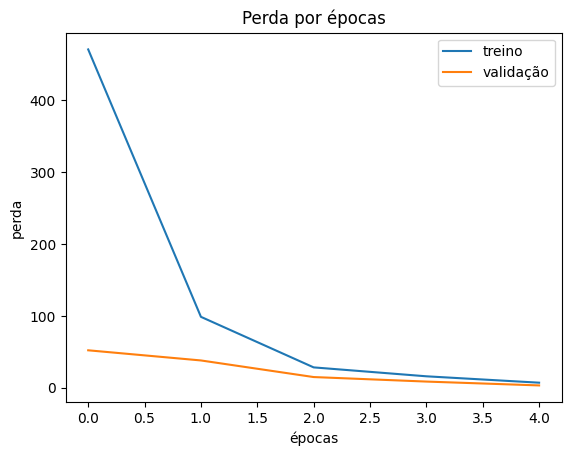

In [82]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# 15 Salvando e carregando o modelo treinado

In [83]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# 16 Testando o modelo salvo

In [84]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 3ms/step
resultado teste: 9
número da imagem de teste: [8]
313/313 [==============================] - 1s 4ms/step
resultado teste modelo salvo: 9
número da imagem de teste: [8]


# 17 Avaliando o modelo

In [85]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 673.2881 - accuracy: 0.1979
Perda do teste: 673.2881469726562
Acurácia do teste: 0.19789999723434448
